In [29]:
import cv2 # Bildbearbeitung
import matplotlib.pyplot as plt # Bilder anzeigen
import os # Um Bilder in den Ordnern zu finden
import numpy as np # Für Arrays mit denen Tensorflow umgehen kann
import tensorflow as tf # für deep-learning / neuronale Netze

In [30]:
#X = [bild1, bild2, bild3]
#Y = [Beschriftung1, Beschriftung2, Beschriftung3]

X = []
Y = []

def lade_bild(pfad): # Bild laden und vorverarbeiten
  bild = cv2.imread(pfad) # bild lesen vom rgba-format
  bild_in_grau = cv2.cvtColor(bild, cv2.COLOR_BGR2GRAY) # Alpha-Wert herausfiltern
  bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren

  return bild_0_1 # Bild an den Aufruf zurückgeben


for zahl in range(10): # Wir haben ordner von 0 bis 9
    pfad = "unsere_daten/"+str(zahl)+"/" # Pfad zusammenbauen
    #print("zahl ist", zahl, "- Der Pfad ist", pfad)
    alle_bilder_namen = os.listdir(pfad) # alle bilder im pfad auflisten
    for name in alle_bilder_namen: # alle bilder in dem Ordner durchgehen
      if ".jpg" in name:
          pfad_zum_bild = pfad + name 
          bild = lade_bild(pfad_zum_bild)

          X.append(bild) # Das Bild an X anhängen
          Y.append(zahl) # Die zugehörige Zahl an Y anhängen

Es wird das Bild mit dem index 201 angezeigt
Y ist  3


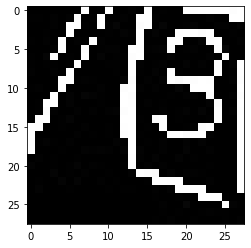

In [31]:
index = 201

print("Es wird das Bild mit dem index", index, "angezeigt")
plt.imshow(X[index], cmap = "gray"), 
print("Y ist ", Y[index])

In [32]:
# listen in numpy arrays umwandeln
Y = np.array(Y) # numpy arrays sind für viele Elemente eine bessere Speichermethode
X = np.array(X) # tensorflow benötigt numpy arrays und kann nicht mit listen arbeiten

# X und Y gleichmäßig mischen
# X und Y werden so gemischt, dass Y[index] die Zahl enthält die in X[index] gespeichert ist
p = np.random.permutation(Y.shape[0]) 
X = X[p]
Y = Y[p] 

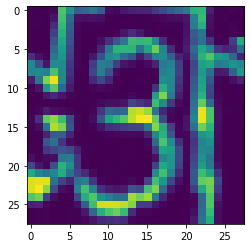

In [33]:
random_gedreht = tf.keras.layers.RandomRotation((-0.05, 0.05))(X[3].reshape(1,28,28,1), training=True)
random_verschieben = tf.keras.layers.RandomTranslation((-0.05,0.05), (-0.05,0.05)) (random_gedreht, training=True)
random_Zoom = tf.keras.layers.RandomZoom((-0.3,0.1)) (random_verschieben, training=True)

plt.imshow(random_Zoom.numpy()[0].reshape(28,28))

In [34]:
inputlayer = tf.keras.layers.Input(shape=(28,28)) # unser Bild hat die Form [Höhe, Breite]

bild_3_d = tf.keras.layers.Reshape((28,28,1)) (inputlayer)

random_gedreht = tf.keras.layers.RandomRotation((-0.05, 0.05))(bild_3_d)
random_verschieben = tf.keras.layers.RandomTranslation((-0.05,0.05), (-0.05,0.05)) (random_gedreht)
random_Zoom = tf.keras.layers.RandomZoom((-0.3,0.1)) (random_verschieben)

filter_1 = tf.keras.layers.Conv2D(16,5, activation="relu") (random_Zoom)
drop1 = tf.keras.layers.Dropout(0.2)(filter_1)


filter_2 = tf.keras.layers.Conv2D(16,3, activation="relu") (drop1)
drop2 = tf.keras.layers.Dropout(0.2)(filter_2)

filter_3 = tf.keras.layers.Conv2D(5,1, activation="relu") (drop2) # von 5x5x16 auf 5x5x5


platt = tf.keras.layers.Flatten()(filter_3)

x = tf.keras.layers.Dense(8,activation="relu")(platt)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(8,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(10,activation="softmax", use_bias = False)(x)

model = tf.keras.Model(inputlayer, output)
print("")
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 random_rotation_1 (RandomRo  (None, 28, 28, 1)        0         
 tation)                                                         
                                                                 
 random_translation_1 (Rando  (None, 28, 28, 1)        0         
 mTranslation)                                                   
                                                                 
 random_zoom_1 (RandomZoom)  (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 16)        416  

In [35]:
fehlerfunktion = tf.keras.losses.SparseCategoricalCrossentropy()
optimierer = tf.keras.optimizers.Adam(0.001)
model.compile(optimierer, fehlerfunktion, metrics="accuracy")

In [36]:
model.fit(X, Y, batch_size = 8, epochs = 200, validation_split = 0.2) # Parameter optimieren

Epoch 1/200
 2/60 [>.............................] - ETA: 5s - loss: 2.3091 - accuracy: 0.0000e+00  

2022-03-28 13:31:05.204137: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.
2022-03-28 13:31:05.205565: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.
2022-03-28 13:31:05.218154: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27599616 exceeds 10% of free system memory.
2022-03-28 13:31:05.224455: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27599616 exceeds 10% of free system memory.
2022-03-28 13:31:05.247476: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18892800 exceeds 10% of free system memory.


60/60 [==============================] - 16s 128ms/step - loss: 2.0096 - accuracy: 0.3104 - val_loss: 1.3662 - val_accuracy: 0.5372
Epoch 2/200
60/60 [==============================] - 6s 101ms/step - loss: 1.4882 - accuracy: 0.4167 - val_loss: 0.8392 - val_accuracy: 0.5372
Epoch 3/200
60/60 [==============================] - 6s 100ms/step - loss: 1.1487 - accuracy: 0.4583 - val_loss: 0.6801 - val_accuracy: 0.5372
Epoch 4/200
60/60 [==============================] - 6s 107ms/step - loss: 0.9473 - accuracy: 0.5625 - val_loss: 0.5906 - val_accuracy: 0.8760
Epoch 5/200
60/60 [==============================] - 6s 101ms/step - loss: 0.7738 - accuracy: 0.6479 - val_loss: 0.4644 - val_accuracy: 0.8678
Epoch 6/200
60/60 [==============================] - 6s 101ms/step - loss: 0.6893 - accuracy: 0.6896 - val_loss: 0.3715 - val_accuracy: 0.8760
Epoch 7/200
60/60 [==============================] - 6s 102ms/step - loss: 0.5892 - accuracy: 0.7375 - val_loss: 0.2373 - val_accuracy: 0.9174
Epoch 8/20


KeyboardInterrupt



In [37]:
model.save("model.h5") # Netzwerk und Parameter speichern